<a href="https://colab.research.google.com/github/kimdesok/FinanceDataReader/blob/master/COVID_Stock_daily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid data and its relation to the stock price

##1. Setting libraries and environment
> * importing libraries for data manipulation, graphics, trend indicator calculation, etc
> * Downloading stock data and preparing them for the further processing

In [1]:
import urllib
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from urllib.request import urlopen
import seaborn as sns


In [2]:
!pip install finance-datareader
import datetime

     |████████████████████████████████| 48 kB 3.7 MB/s 



### Downloading the COVID data

In [3]:
!wget https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv

--2022-04-03 22:10:36--  https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv [following]
--2022-04-03 22:10:37--  https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50045771 (48M) [text/plain]
Saving to: ‘owid-covid-data.csv’

owid-covid-data.csv 100%[===================>]  47.73M   136MB/s    in 0.3s    

2022-04-03 22:10:38 (136 MB/s) - ‘owid-covid-data.csv’ saved [50045771

##2. Brief EDA
 > * Display the correlation between the price and the COVID  new cases in a nation.

In [4]:
import FinanceDataReader as fdr
from datetime import date
from numpy.core.numeric import ComplexWarning

# Plot the new COVID case
def new_case_graph(my_file, inputLocation, inputPastDays):
  short_df = pd.read_csv(my_file)
  #print(short_df.columns)

  short_df = short_df[short_df['location']==inputLocation]

  columns=['date', 'new_cases']
  short_df= short_df[columns]

  # sort the short sell data
  short_df['Date'] = pd.to_datetime(short_df['date'])
  short_df = short_df.pivot_table(index='Date', values=['new_cases'])
  #short_df = short_df.sort_index()

  #Set the beginning date for the analysis
  #print(short_df.index[0])
  start_date = short_df.index[0]
  end_date = short_df.index[-1] 

  #end_date = date.today()

  print('Displaying the data from ', short_df.index[-1*inputPastDays], 'to ', end_date, '\n')

  plt.figure(figsize = (10,8))

  plt.plot(short_df['new_cases'][-1*inputPastDays:], color = 'lime', label='New cases', marker='o', alpha=0.5)
  plt.plot(short_df['new_cases'][-1*inputPastDays:].ewm(7, min_periods=1).mean(), color = 'green', label='New cases 7 day ewma')
  plt.xlabel('Date')
  plt.ylabel('New cases')
  plt.title('COVID new cases in ' + inputLocation)
  plt.legend()
  plt.grid(True)
  plt.show() 

  print(short_df.tail())
  return short_df

In [32]:
# get stock codes from the company names
def stock_graphs(Company_names, short_df):

    #Set the beginning date for the analysis
    start_date = short_df.index[0]
    #end_date = short_df.index[-1] 
    end_date = date.today()
    print('Displaying the data from ', start_date, 'to ', end_date, '\n')

    for name, code in Company_names.items():
      # Load the stock market data from start_date to today
      full_df = fdr.DataReader(code, start_date, end_date)

      #Data transform using the closing price
      full_df = full_df.pivot_table(index='Date', values=['Close'])

      full_df.columns = [name]

      #stock_data.info()

      full_df['mva5'] = full_df[name].fillna(0).ewm(50, min_periods=1).mean()
      full_df['mva5_cases'] = short_df['new_cases'].fillna(0).ewm(7, min_periods=1).mean()

      plt.figure(figsize = (10,8))
      norm_df = full_df[name]/full_df[name].max()
      plt.plot(norm_df, color = 'lime', label ='Price', alpha=0.5)
      plt.plot(norm_df.fillna(0).ewm(50, min_periods=1).mean(), color = 'green', label='Price 50 days ewma')

      case_norm_df = short_df['new_cases']/short_df['new_cases'].max()
      plt.plot(case_norm_df, color = 'darkorange', label='New cases', alpha=0.5)
      plt.plot(case_norm_df.fillna(0).ewm(7, min_periods=1).mean(), color = 'orange', label='New cases 7 days ewma')

      plt.xlabel('Date')
      plt.xticks(rotation=45)
      plt.ylabel('Fractional Change')
      plt.title(name +': Relation between the price and COVID new cases')
      plt.legend()
      plt.grid(True)

      plt.show()  # show the plot

      plt.clf()  # clear the plot space

def get_codes(my_file, names):
  df = pd.read_csv(my_file, encoding='euc-kr', dtype=object)
  code_list = {}
  for name in names:
    code = df.query("names=='{}'".format(name))['codes'].to_string(index=False)
    code = code.strip()
    code_list[name] = code
  return code_list

  #print(code_df.head())

  

{'SK바이오사이언스': '302440', '씨젠': '096530', '피씨엘': '241820', '프레스티지바이오파마': '950210', '삼성전자': '005930', '셀트리온': '068270', '현대자동차': '005380', '대한항공': '003490', '호텔신라': '008770', 'HK이노엔': '195940', '크래프톤': '259960'}
Displaying the data from  2022-02-12 00:00:00 to  2022-04-02 00:00:00 



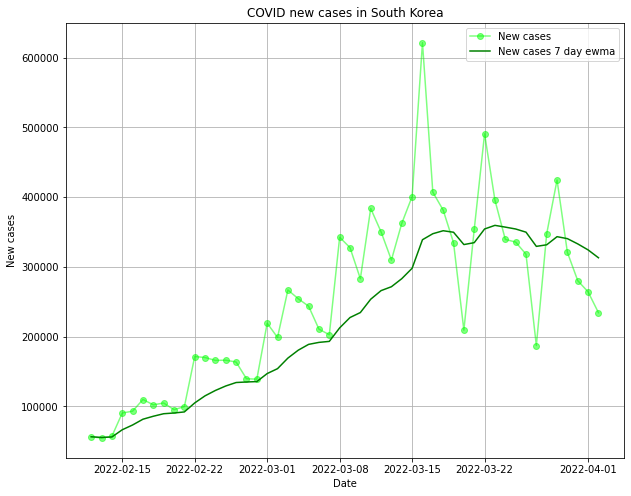

            new_cases
Date                 
2022-03-29   424528.0
2022-03-30   320675.0
2022-03-31   280187.0
2022-04-01   264097.0
2022-04-02   234301.0
{'SK바이오사이언스': 'SK Bioscience', '씨젠': 'Seegene', '피씨엘': 'PCL', '프레스티지바이오파마': 'Prestige Biopharma', '삼성전자': 'Samsung', '셀트리온': 'Celltrion', '현대자동차': 'Hyundai Automobile', '대한항공': 'Korean Air', '호텔신라': 'Hotel Shilla', 'HK이노엔': 'HK InnoN', '크래프톤': 'Krafton'}
{'SK Bioscience': '302440', 'Seegene': '096530', 'PCL': '241820', 'Prestige Biopharma': '950210', 'Samsung': '005930', 'Celltrion': '068270', 'Hyundai Automobile': '005380', 'Korean Air': '003490', 'Hotel Shilla': '008770', 'HK InnoN': '195940', 'Krafton': '259960'}
Displaying the data from  2020-01-23 00:00:00 to  2022-04-03 



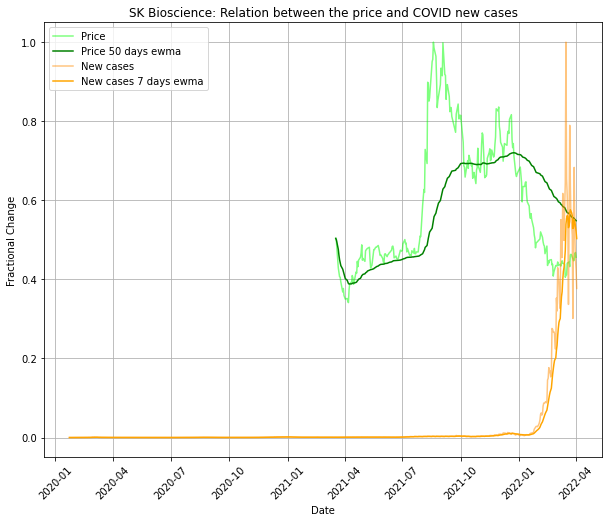

<Figure size 432x288 with 0 Axes>

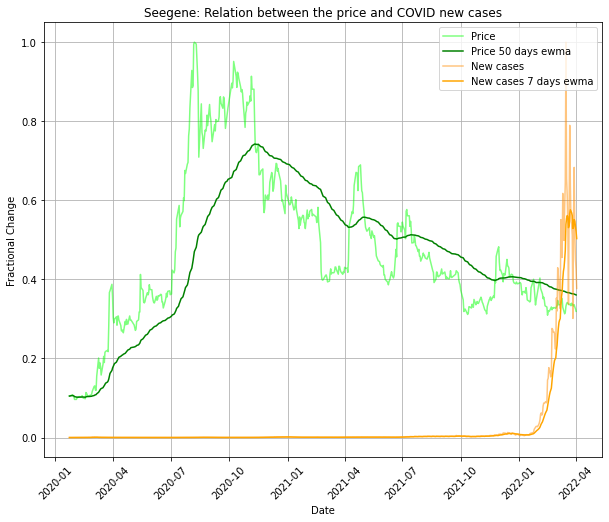

<Figure size 432x288 with 0 Axes>

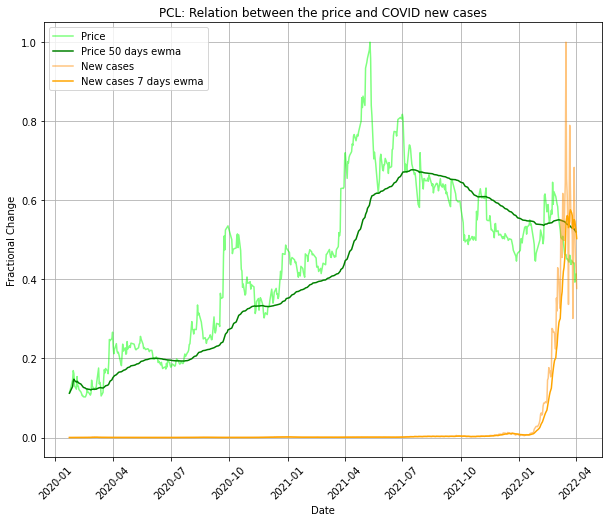

<Figure size 432x288 with 0 Axes>

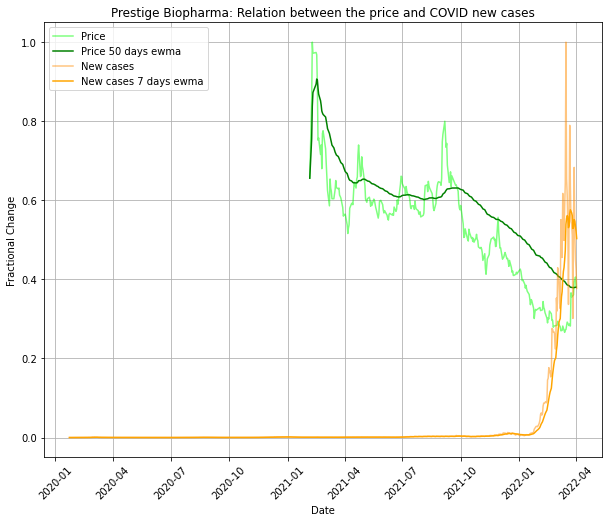

<Figure size 432x288 with 0 Axes>

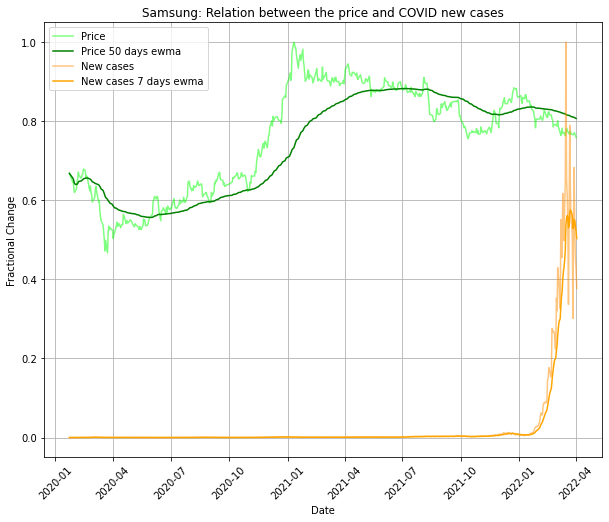

<Figure size 432x288 with 0 Axes>

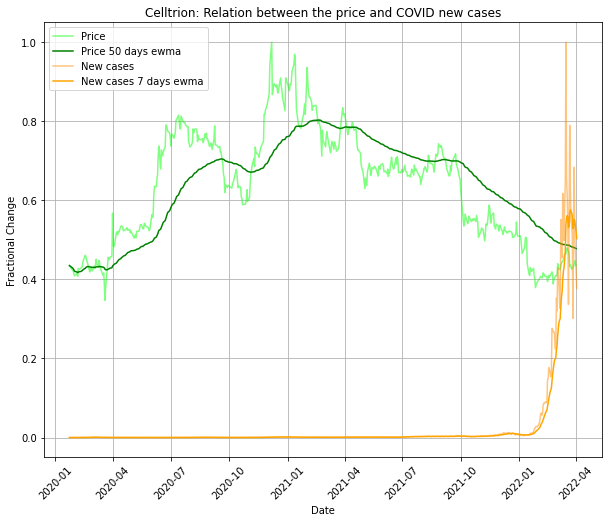

<Figure size 432x288 with 0 Axes>

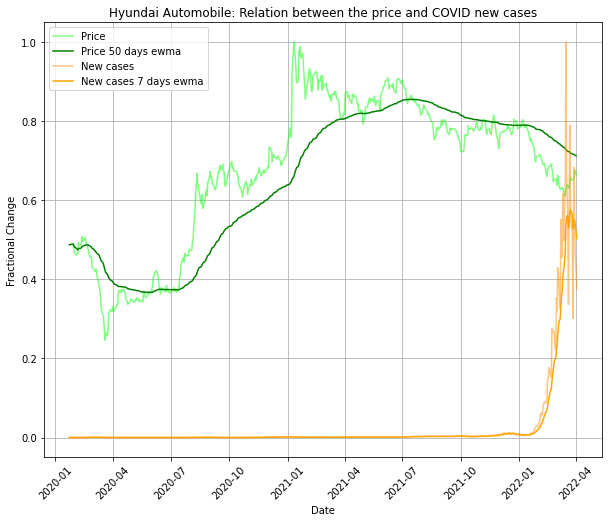

<Figure size 432x288 with 0 Axes>

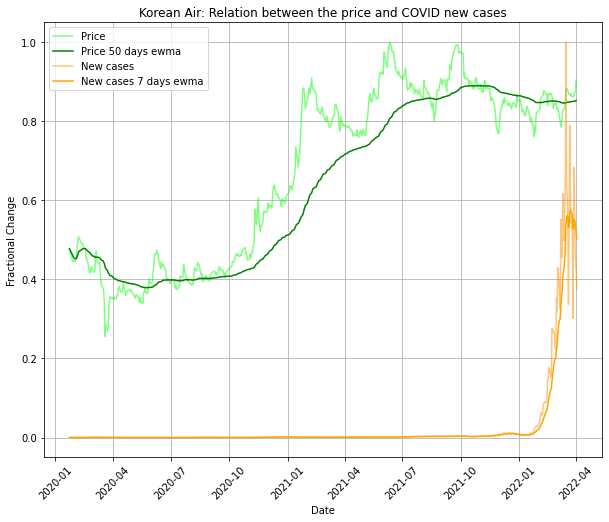

<Figure size 432x288 with 0 Axes>

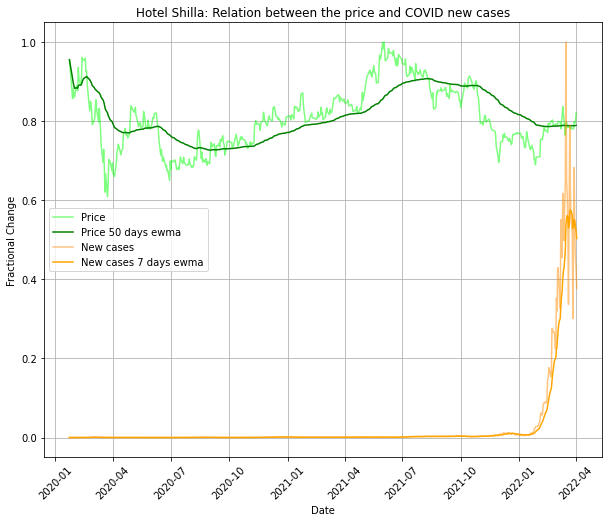

<Figure size 432x288 with 0 Axes>

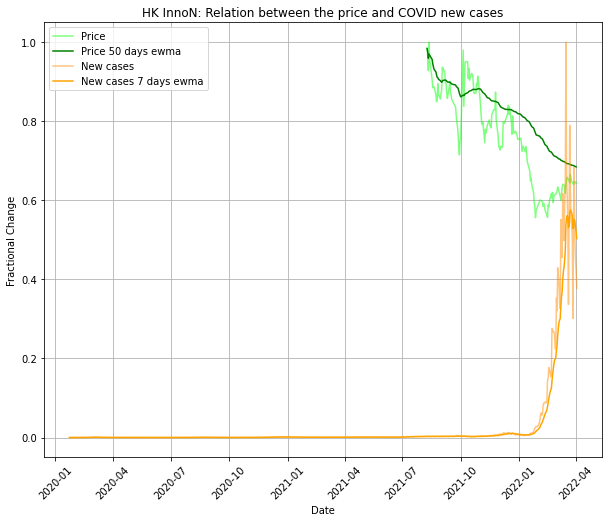

<Figure size 432x288 with 0 Axes>

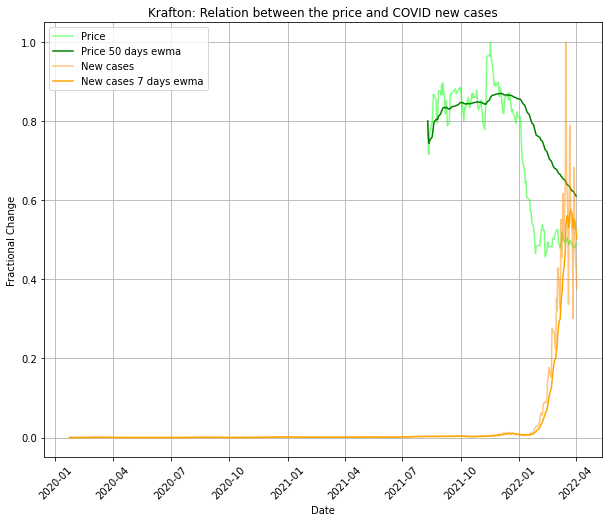

<Figure size 432x288 with 0 Axes>

In [33]:
from matplotlib.ticker import EngFormatter
#This dictionary contains the name of a company in English and in Korean.
Company_names = {'SK바이오사이언스':'SK Bioscience', '씨젠':'Seegene', '피씨엘':'PCL', '프레스티지바이오파마':'Prestige Biopharma', \
                '삼성전자':'Samsung','셀트리온':'Celltrion', '현대자동차':'Hyundai Automobile', \
                '대한항공':'Korean Air', '호텔신라':'Hotel Shilla', 'HK이노엔':'HK InnoN', '크래프톤':'Krafton'}

#The stock data of s. Korea requires a numeric code for the retrieval.
#The stock_codes.csv has the name of the stock in Korean and its numeric code.
my_codes = '/content/drive/MyDrive/datasets/stock_codes.csv'

#To get the list of numeric codes
code_list = get_codes(my_codes, Company_names)
print(code_list)

# Load the covid data from the OWID site
my_file = '/content/owid-covid-data.csv'
inputLocation = 'South Korea'
inputPastDays = 50

# Plot the covid data
short_df = new_case_graph(my_file, inputLocation, inputPastDays)
print(Company_names)
# Get the company name in English as keys and the numeric code as values (in the dictionary)
Company_names = {eng: code_list[kor] for kor, eng in Company_names.items()}
print(Company_names)

# Plot the stock and COVID data
stock_graphs(Company_names, short_df)

Displaying the data from  2021-10-24 00:00:00 to  2022-01-31 00:00:00 



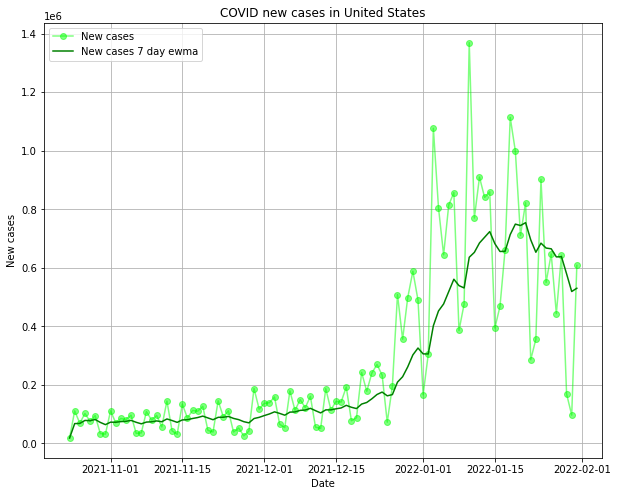

            new_cases
Date                 
2022-01-27   443607.0
2022-01-28   642857.0
2022-01-29   169002.0
2022-01-30    96887.0
2022-01-31   608201.0
{'Bio-Rad Laboratories, Inc.': 'BIO', 'Novavax, Inc.': 'NVAX', 'Abbott Laboratories': 'ABT', 'Quidel Corporation': 'QDEL', 'Moderna, Inc.': 'MRNA', 'Pfizer Inc. ': 'PFE'}
Displaying the data from  2020-01-23 00:00:00 to  2022-02-01 



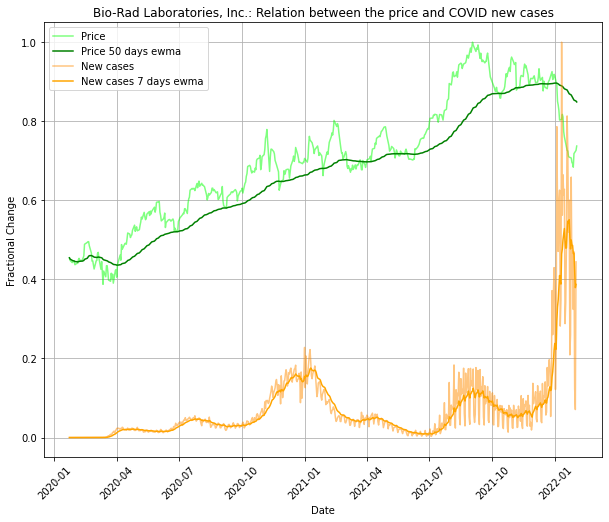

<Figure size 432x288 with 0 Axes>

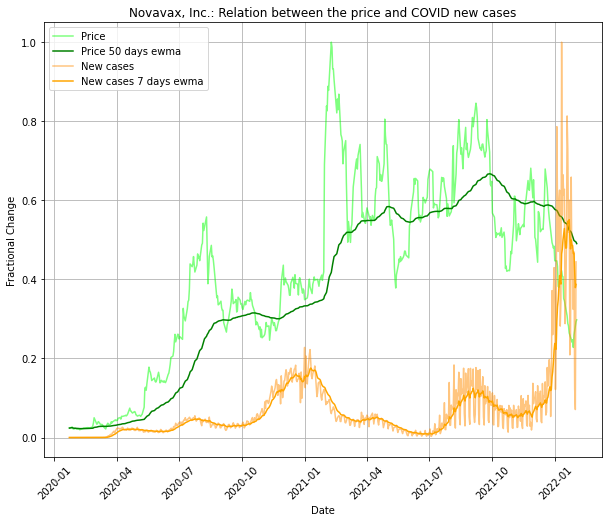

<Figure size 432x288 with 0 Axes>

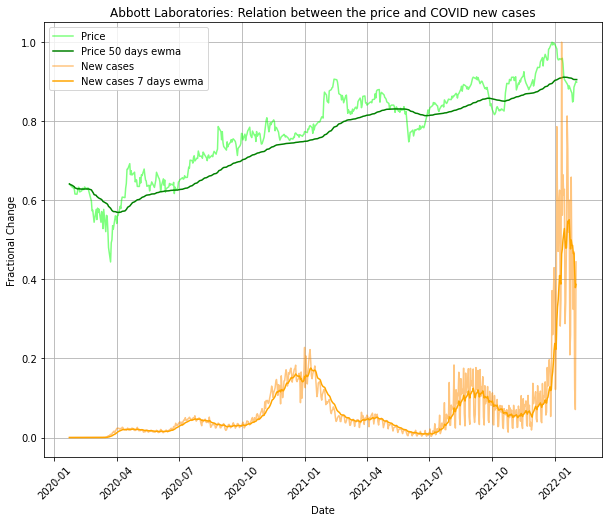

<Figure size 432x288 with 0 Axes>

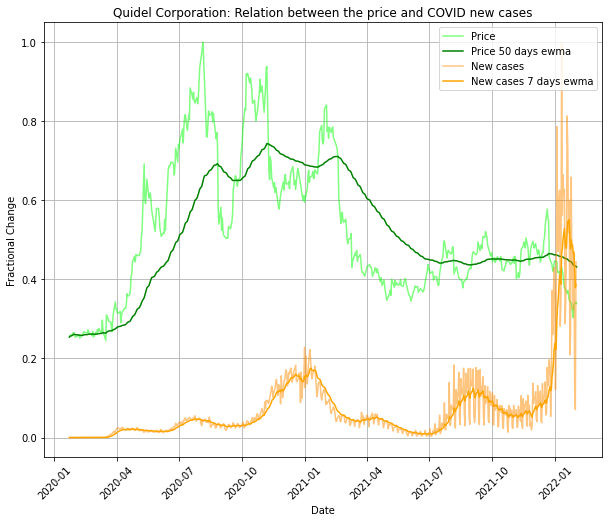

<Figure size 432x288 with 0 Axes>

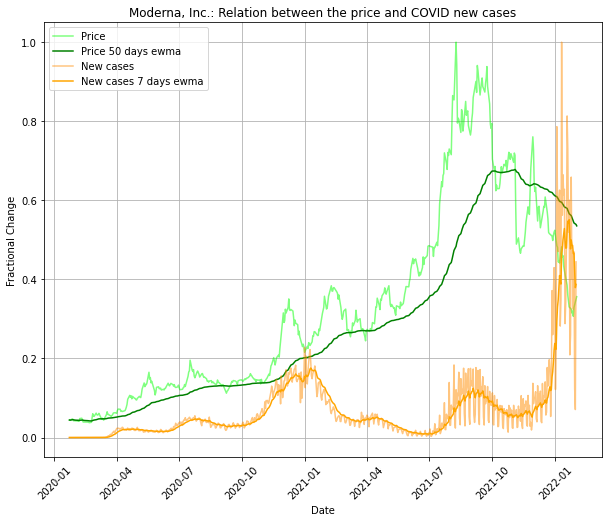

<Figure size 432x288 with 0 Axes>

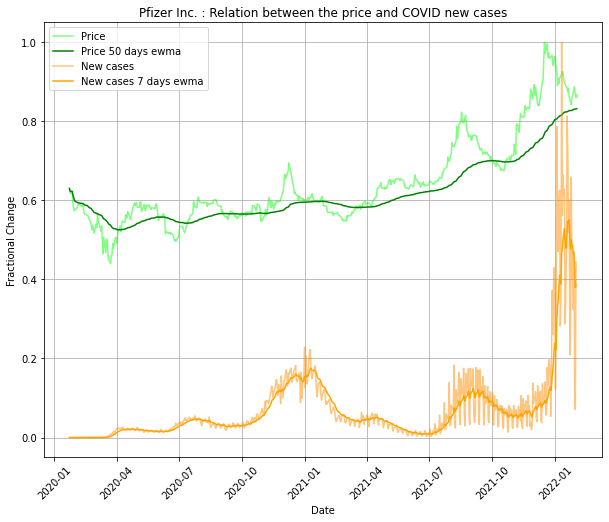

<Figure size 432x288 with 0 Axes>

In [ ]:
#code_list is NOT required for US stocks.
inputLocation = 'United States'
inputPastDays = 100 
short_df = new_case_graph(my_file, inputLocation, inputPastDays)

#For US Companies
US_Companies= {'Bio-Rad Laboratories, Inc.':'BIO', 'Novavax, Inc.':'NVAX', 'Abbott Laboratories':'ABT', 'Quidel Corporation':'QDEL', \
               'Moderna, Inc.' : 'MRNA', 'Pfizer Inc. ':'PFE'}

print(US_Companies)
stock_graphs(US_Companies, short_df)

{'WisdomTree US EFF Core Fund': 'NTSX', 'Amplify BlackSwan Growth & Treasury Core': 'SWAN', 'iShares Core Growth Allocation': 'AOR', 'RPAR Risk Parity': 'RPAR', 'iShares TIPS Bond ETF': 'TIP'}
Displaying the data from  2020-01-23 00:00:00 to  2022-02-01 



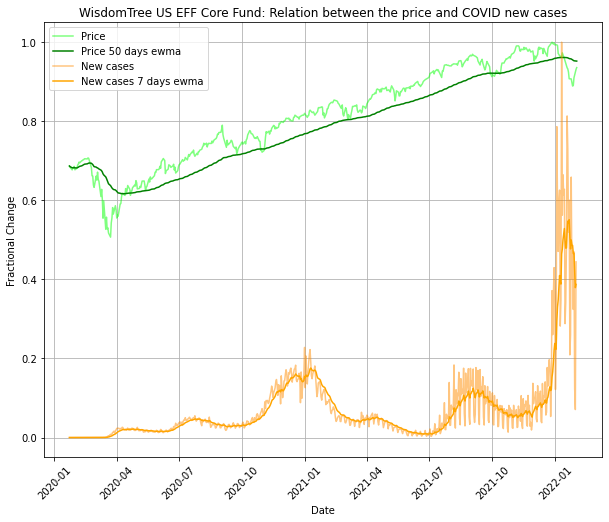

<Figure size 432x288 with 0 Axes>

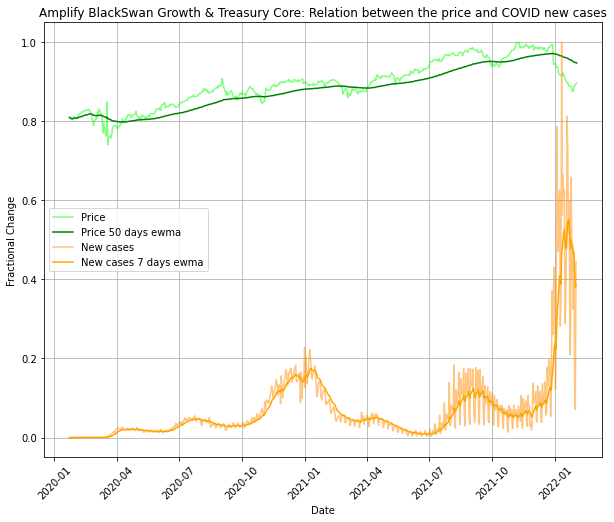

<Figure size 432x288 with 0 Axes>

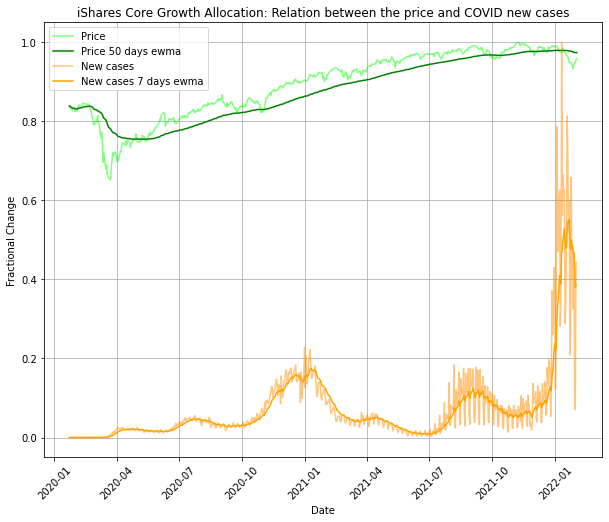

<Figure size 432x288 with 0 Axes>

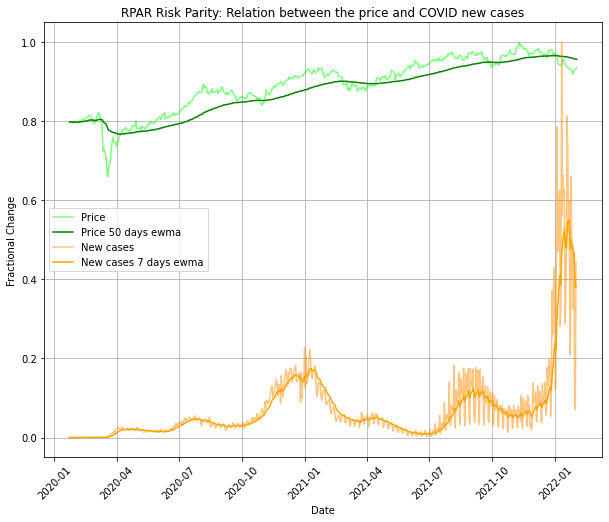

<Figure size 432x288 with 0 Axes>

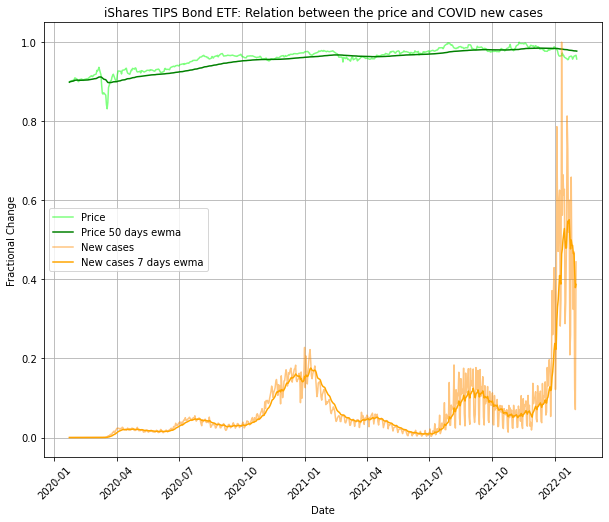

<Figure size 432x288 with 0 Axes>

In [ ]:
#For US EFTs
US_ETFs = {'WisdomTree US EFF Core Fund':'NTSX','Amplify BlackSwan Growth & Treasury Core':'SWAN', \
               'iShares Core Growth Allocation':'AOR', 'RPAR Risk Parity': 'RPAR', 'iShares TIPS Bond ETF':'TIP'}

print(US_ETFs)
stock_graphs(US_ETFs, short_df)